In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iabhishekofficial/mobile-price-classification")

print("Path to dataset files:", path)

c:\Users\Bruger\anaconda3\envs\python_3_10_16\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 70.6k/70.6k [00:00<00:00, 432kB/s]

Extracting files...
Path to dataset files: C:\Users\Bruger\.cache\kagglehub\datasets\iabhishekofficial\mobile-price-classification\versions\1


In [32]:
df = pd.read_csv("C:/Users/Bruger/.cache/kagglehub/datasets/iabhishekofficial/mobile-price-classification/versions/1/train.csv")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [33]:
df = df.sample(700)

In [34]:
X = df.drop(columns="price_range")

In [35]:
y = df[["price_range"]]

In [36]:
y

,price_range
61,0
916,0
1179,3
1603,1
581,3
...,...
1549,1
265,1
947,0
592,1


In [37]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [38]:
X.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [39]:
X.duplicated().sum()

np.int64(0)

#### Training

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
dtree = DecisionTreeClassifier(criterion="entropy")

In [42]:
dtree = dtree.fit(X_train, y_train)

##### Evaluating

In [43]:
y_pred = dtree.predict(X_test)

In [44]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average="macro"))
print("Recall:", metrics.recall_score(y_test, y_pred, average="macro"))
print("F1:", metrics.f1_score(y_test, y_pred, average="macro"))

Accuracy: 0.8571428571428571
Precision: 0.8462227559457258
Recall: 0.8500152854991564
F1: 0.8472085383194679


In [45]:
print("Confusion Matrix:", metrics.confusion_matrix(y_test.values, y_pred))

Confusion Matrix: [[40  4  0  0]
 [ 1 33  3  0]
 [ 0  1 23  7]
 [ 0  0  4 24]]


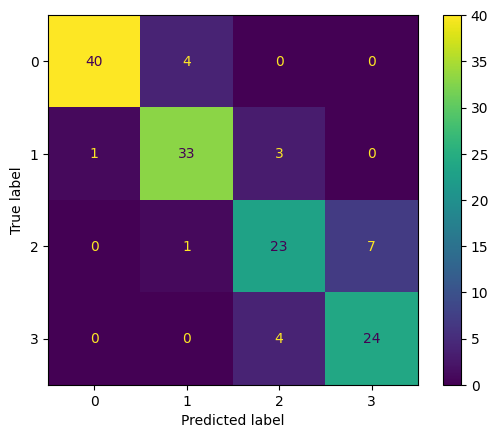

In [46]:
cm = metrics.confusion_matrix(y_test.values, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dtree.classes_)
disp.plot()

In [47]:
#pip install graphviz
#pip install pydotplus

In [58]:
import graphviz

##### Plot tree's

[Text(0.46638257575757575, 0.9444444444444444, 'x[13] <= 1768.0\nentropy = 2.0\nsamples = 560\nvalue = [137, 144, 138, 141]'),
 Text(0.17424242424242425, 0.8333333333333334, 'x[13] <= 1082.5\nentropy = 1.049\nsamples = 223\nvalue = [136, 84, 3, 0]'),
 Text(0.3203125, 0.8888888888888888, 'True  '),
 Text(0.08333333333333333, 0.7222222222222222, 'x[0] <= 1637.0\nentropy = 0.463\nsamples = 112\nvalue = [101, 11, 0, 0]'),
 Text(0.030303030303030304, 0.6111111111111112, 'x[11] <= 1647.5\nentropy = 0.089\nsamples = 89\nvalue = [88, 1, 0, 0]'),
 Text(0.015151515151515152, 0.5, 'entropy = 0.0\nsamples = 87\nvalue = [87, 0, 0, 0]'),
 Text(0.045454545454545456, 0.5, 'x[18] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1, 0, 0]'),
 Text(0.030303030303030304, 0.3888888888888889, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0]'),
 Text(0.06060606060606061, 0.3888888888888889, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0]'),
 Text(0.13636363636363635, 0.6111111111111112, 'x[12] <= 1713.5\nen

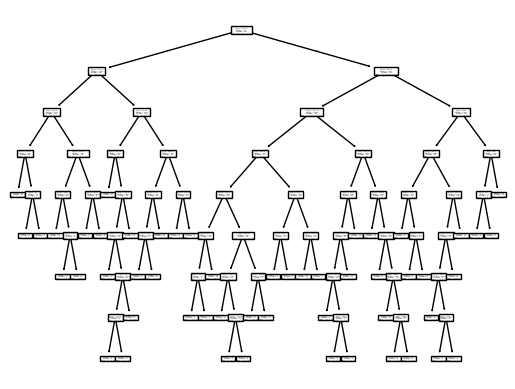

In [ ]:
from sklearn import tree
from sklearn.tree import export_graphviz
#import graphviz

export_graphviz(dtree, out_file='mobile_price_kaggle.dot', 
                class_names=True, 
                #class_names=X, 
                feature_names=X.columns,
                impurity=False,
                filled=True)
  
tree.plot_tree(dtree)

In [64]:
!pip install graphviz

In [70]:
import subprocess
from IPython.display import Image

# Run the Graphviz dot command to create a PNG image from the .dot file
subprocess.run(['dot', '-Tpng', 'mobile_price_kaggle.dot', '-o', 'mobile_price_kaggle.png'])

# Display the generated PNG image
Image(filename='mobile_price_kaggle.png')


FileNotFoundError: [WinError 2] The system cannot find the file specified

In [69]:
! dot -Tpng mobile_price_kaggle.dot -o mobile_price_kaggle.png

from IPython import display
#display.Image("mobile_price_kaggle.png")

'dot' is not recognized as an internal or external command,
operable program or batch file.


In [61]:
!pip install graphviz

In [62]:
import graphviz

with open('mobile_price_kaggle.dot') as f:
    tree_graph = f.read()

graph = graphviz.Source(tree_graph)
# This render the .dot file into a PDF
graph.render("mobile_price_kaggle", view=True)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH